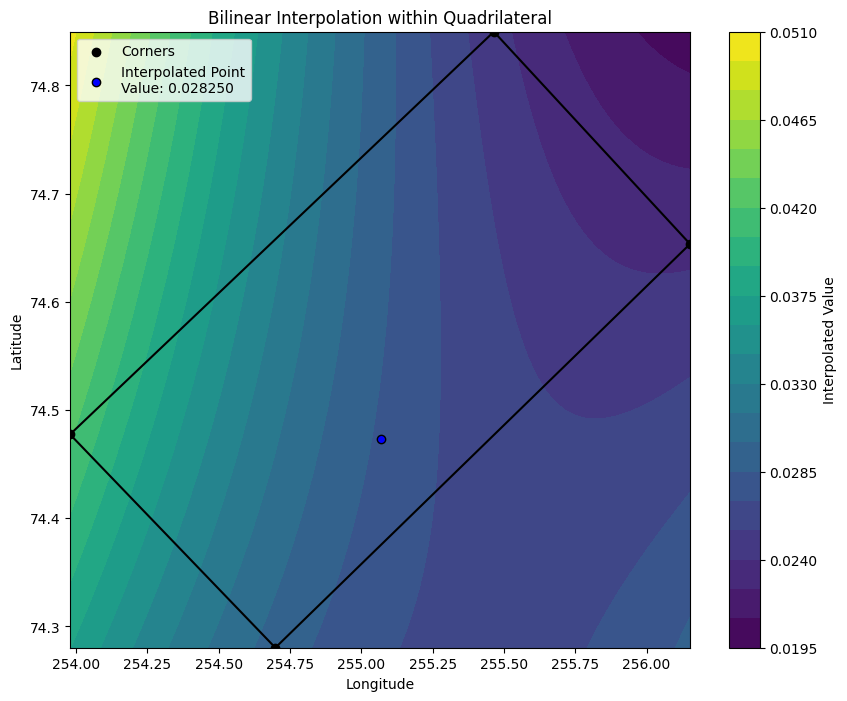

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quad_utils import quad_utils_mod
import mplcursors

# Given coordinates and values
x_corners = [253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337]
y_corners = [74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753]
values = [0.04222093679422526, 0.02939444349332336, 0.02361927128232367, 0.02457275269829678]

# Generate a grid of points within the quadrilateral
num_points = 100
x_grid = np.linspace(min(x_corners), max(x_corners), num_points)
y_grid = np.linspace(min(y_corners), max(y_corners), num_points)

x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
z_mesh = np.zeros_like(x_mesh)

# Perform interpolation for each point in the grid
for i in range(num_points):
    for j in range(num_points):
        z_mesh[i, j] = quad_utils_mod.quad_bilinear_interp(x_mesh[i, j], y_mesh[i, j], x_corners, y_corners, values, do_rotate=True)

# Define the single interpolated point
interpolated_point = (255.070312500000, 74.4735717773438)
interpolated_value = quad_utils_mod.quad_bilinear_interp(interpolated_point[0], interpolated_point[1], x_corners, y_corners, values, do_rotate=True)



# Plot the results
plt.figure(figsize=(10, 8))
contour = plt.contourf(x_mesh, y_mesh, z_mesh, levels=20, cmap='viridis')
plt.colorbar(contour, label='Interpolated Value')

# Plot the quadrilateral corners and edges
plt.scatter(x_corners, y_corners, color='black', label='Corners')
plt.plot(x_corners + [x_corners[0]], y_corners + [y_corners[0]], 'k-')

# Plot the single interpolated point
plt.scatter(interpolated_point[0], interpolated_point[1], color='blue', label=f'Interpolated Point\nValue: {interpolated_value:.6f}', edgecolors='black')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bilinear Interpolation within Quadrilateral')
plt.legend()

# Add mplcursors for interactive hover
cursor = mplcursors.cursor(contour, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"z={z_mesh[sel.target[1], sel.target[0]]:.6f}"))

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from quad_utils import quad_utils_mod
import mplcursors
from mpl_toolkits.mplot3d import Axes3D

# Given coordinates and values
x_corners = [253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337]
y_corners = [74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753]
values = [0.04222093679422526, 0.02939444349332336, 0.02361927128232367, 0.02457275269829678]

# Generate a grid of points within the quadrilateral
num_points = 100
x_grid = np.linspace(min(x_corners), max(x_corners), num_points)
y_grid = np.linspace(min(y_corners), max(y_corners), num_points)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
z_mesh = np.zeros_like(x_mesh)

# Perform interpolation for each point in the grid
for i in range(num_points):
    for j in range(num_points):
        z_mesh[i, j] = quad_utils_mod.quad_bilinear_interp(x_mesh[i, j], y_mesh[i, j], x_corners, y_corners, values, do_rotate=True)

# Define the single interpolated point
interpolated_point = (255.070312500000, 74.4735717773438)
interpolated_value = quad_utils_mod.quad_bilinear_interp(interpolated_point[0], interpolated_point[1], x_corners, y_corners, values, do_rotate=True)

# Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none')
fig.colorbar(surface, ax=ax, label='Interpolated Value')

# Plot the quadrilateral corners and edges
ax.scatter(x_corners, y_corners, values, color='black', label='Corners')
ax.plot(x_corners + [x_corners[0]], y_corners + [y_corners[0]], values + [values[0]], 'k-')

# Plot the single interpolated point
ax.scatter(interpolated_point[0], interpolated_point[1], interpolated_value, color='blue', label=f'Interpolated Point\nValue: {interpolated_value:.6f}', edgecolors='black')

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Interpolated Value')
ax.set_title('Bilinear Interpolation within Quadrilateral')
ax.legend()

# Show the plot
plt.show()

TypeError: quad_utils.quad_utils_mod.quad_bilinear_interp() missing required argument 'do_rotate' (pos 6)